In [1]:
# 集成学习(ensemble learning)库
from autogluon.tabular import TabularPredictor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

集成学习主要有下面几种

Bootstrap聚合（Bagging）：它使集成模型中的每个模型在投票时具有相同的权重。它通过对不同的子数据集进行训练，然后对结果进行平均或投票，来降低模型的方差。随机森林就是一种基于Bagging的集成方法。

Boosting：它通过在训练新模型实例时更注重先前模型错误分类的实例来增量构建集成模型。它通过对每个模型赋予不同的权重，然后对结果进行加权平均或投票，来降低模型的偏差。AdaBoost和GBDT就是一些常用的Boosting方法。

Stacking：它是一种训练一个模型用于组合其他各个模型的方法。它首先在训练数据上训练多个不同的模型，然后把这些模型的输出作为输入来训练一个元模型，以得到一个最终的输出。

In [4]:
columns_need = [
    "nch",
    "theta",
    "sigma",
    "cx",
    "cy",
    "sumpf",
    "mr1",
]

In [2]:
train_data = np.load("./lowEnergy_trainData.npz")

label = "isgamma"


columns_need.append(label)
train_data = {key: train_data[key] for key in columns_need}
for para in ["sumpf"]:
    train_data[para] = np.log10(train_data[para])
train_data = pd.DataFrame(train_data)

In [2]:
# predictor = TabularPredictor(
#     label=label,
#     path="./autogloun_model/lowEnergy_Allcolumn",
#     eval_metric="roc_auc",
# ).fit(train_data, num_cpus=40, num_gpus=2)
predictor = TabularPredictor.load("./autogloun_model/lowEnergy_Allcolumn/")

In [5]:
test_data = np.load("./lowEnergy_testData.npz")

test_data = {key: test_data[key] for key in columns_need}
for para in ["sumpf"]:
    test_data[para] = np.log10(test_data[para])
test_data = pd.DataFrame(test_data)

In [6]:
# 计算特征重要性
predictor.feature_importance(test_data)

,importance,stddev,p_value,n,p99_high,p99_low
nch,0.321597,0.006806,2.405796e-08,5,0.335611,0.307583
sumpf,0.035581,0.004466,2.917906e-05,5,0.044778,0.026385
theta,0.034081,0.003944,2.115240e-05,5,0.042203,0.025959
mr1,0.024915,0.002712,1.659121e-05,5,0.030500,0.019330
cy,0.024215,0.005535,3.059036e-04,5,0.035611,0.012819
cx,0.021674,0.003061,4.647467e-05,5,0.027977,0.015372
sigma,0.015011,0.003558,3.521442e-04,5,0.022338,0.007684


In [6]:
test_data["prob"] = predictor.predict_proba(test_data)[1]

KeyboardInterrupt: 

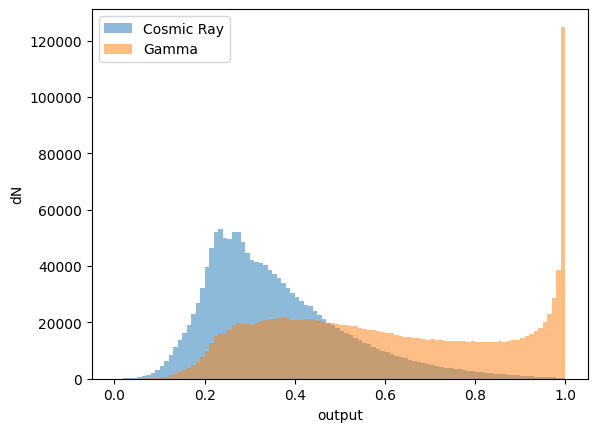

In [ ]:
# 查看一下分布
plt.hist(
    test_data["prob"][test_data["isgamma"] == 0],
    bins=np.linspace(0, 1, 101),
    alpha=0.5,
    label="Cosmic Ray",
)
plt.hist(
    test_data["prob"][test_data["isgamma"] == 1],
    bins=np.linspace(0, 1, 101),
    alpha=0.5,
    label="Gamma",
)
plt.xlabel("output")
plt.ylabel("dN")
plt.legend()
plt.show()

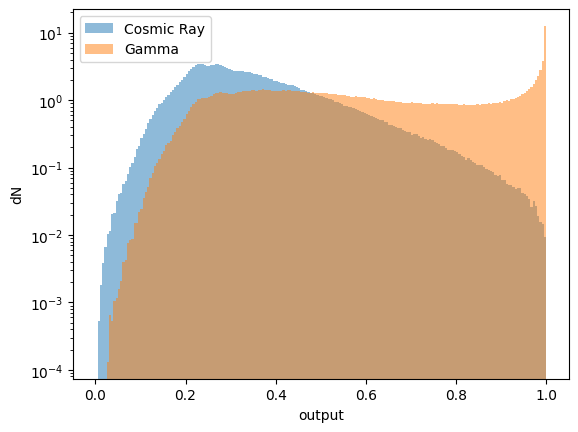

In [ ]:
# 查看一下分布
plt.hist(
    test_data["prob"][test_data["isgamma"] == 0],
    bins=np.linspace(0, 1, 201),
    alpha=0.5,
    label="Cosmic Ray",
    density=True,
)
plt.hist(
    test_data["prob"][test_data["isgamma"] == 1],
    bins=np.linspace(0, 1, 201),
    alpha=0.5,
    label="Gamma",
    density=True,
)
plt.legend()
plt.yscale("log")
plt.xlabel("output")
plt.ylabel("dN")
plt.show()

### 查看不同sumpf的分类好坏

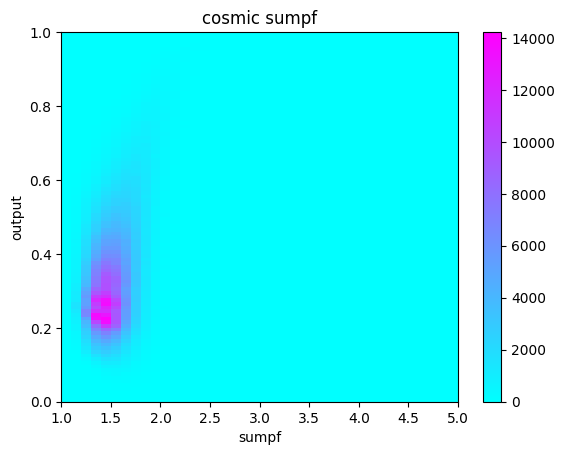

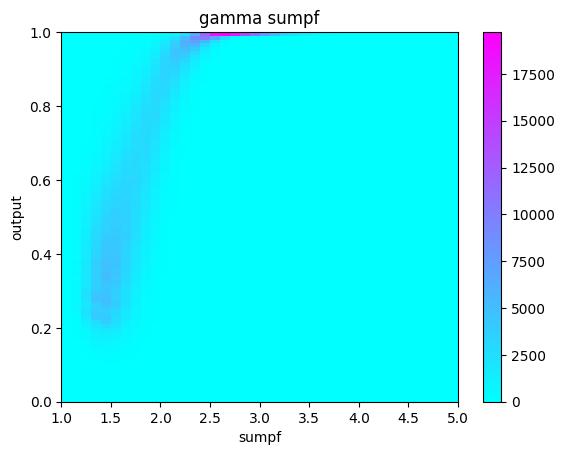

In [ ]:
# sumpf
para = "sumpf"
xbins = np.linspace(1, 5, 41)
ybins = np.linspace(0, 1, 101)
H_cosmic, _, _ = np.histogram2d(
    test_data[para][test_data["isgamma"] == 0],
    test_data["prob"][test_data["isgamma"] == 0],
    bins=(xbins, ybins),
)
H_gamma, _, _ = np.histogram2d(
    test_data[para][test_data["isgamma"] == 1],
    test_data["prob"][test_data["isgamma"] == 1],
    bins=(xbins, ybins),
)
H_cosmic = H_cosmic.T
H_gamma = H_gamma.T
c = plt.pcolormesh(xbins, ybins, H_cosmic, cmap="cool")
plt.colorbar(c)
plt.ylabel("output")
plt.xlabel(para)
plt.title(f"cosmic {para}")
plt.show()
c = plt.pcolormesh(xbins, ybins, H_gamma, cmap="cool")
plt.colorbar(c)
plt.ylabel("output")
plt.xlabel(para)
plt.title(f"gamma {para}")
plt.show()